#### Introduction: Sentiment Analysis of Online Stores in Kenya

The rapid expansion of e-commerce in Kenya has seen platforms like Jumia, Kilimall, and Jiji dominate the online shopping landscape, offering consumers unprecedented convenience. As competition intensifies and customer expectations continue to rise, it becomes increasingly important for online platforms to not only attract customers but also retain their loyalty by delivering exceptional experiences. To remain competitive, these platforms must continuously refine their offerings based on user feedback. This project leverages **sentiment analysis** of customer reviews from popular Kenyan e-commerce sites to extract valuable insights into consumer perceptions. The primary goal is to inform the development of a new e-commerce app, "X," by identifying strengths, weaknesses, and opportunities for enhancement within the current market.

By analyzing patterns in sentiment, we aim to pinpoint the aspects of existing platforms that resonate most with users, as well as highlight common frustrations and areas in need of improvement. This research will compare the sentiment scores of various platforms to determine which has better customer reviews, thereby providing actionable insights for the new app's development team. The findings will enable "App X" to strategically adopt best practices from established competitors while avoiding pitfalls, ultimately helping developers create a user-centric platform optimized for the Kenyan market. These data-driven insights will empower the team to prioritize features that align with consumer preferences, fostering a competitive edge in the evolving e-commerce landscape.

###### Key Questions Our Analysis Aims to Answer:

1. Which online store (Jumia, Kilimall, or Jiji) has the highest positive sentiment from customers based on recent reviews?
2. What are the common pain points or negative experiences reported by users across these platforms?
3. Which features or aspects of online shopping do customers most frequently praise on each platform?
4. What actionable insights can be drawn to enhance the functionality and user experience of the new app "X" based on customer feedback from existing platforms? 

These questions will guide the analysis to ensure that the new app "X" is optimized for customer needs and stands out in the competitive online shopping market in Kenya.



In [24]:
!pip install google_play_scraper


In [37]:
!pip install emoji
!pip install wordcloud
!pip install TextBlob

## We can use libraries like NLTK, Gensim, TextBlob, spaCY, CoreNLP for data pre-processing and sentiment analysis. 
## We will use NLTK for pre-processing of data and TextBlob to calculate sentiment score (sentiment polarity and subjectivity ).

In [38]:
# importing important libraries
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import string
import emoji
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize

#### Jumia Reviews Web Scrapping, Data Importation and data description

##### 1.Jumia Web scrapping


In [71]:
#scrap all reviews
Jumia, continuation_token = reviews(
    'com.jumia.android',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with = None
    )

##### 2. Jumia Data Import
Converting Jumia scrapped data to Data Frame(Structured data) for our analysis.

In [72]:
#Convert into a data frame

Jumia_data = pd.DataFrame(np.array(Jumia), columns = ['review'])
Jumia_data = Jumia_data.join(pd.DataFrame(Jumia_data.pop('review').tolist()))
Jumia_data.head()
     

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4b5b0a4a-9b35-401f-a2ca-9b6e489b2b37,Eli Bigman,https://play-lh.googleusercontent.com/a-/ALV-U...,I love the recent update! The price filter adj...,4,38,14.17.0,2024-06-11 17:50:55,Hello Richard! Thank you so much for taking th...,2021-07-23 16:05:08,14.17.0
1,cc7f01e9-4695-4953-8d58-ef0f0eb7679f,Olawande Adebayo,https://play-lh.googleusercontent.com/a-/ALV-U...,It's an easy to use app with just one challeng...,4,5,7.6,2021-11-03 12:45:20,"Thank you , dear Adebayo ^^",2018-02-13 17:03:12,7.6
2,d367c2b9-f07f-4664-aaac-a514fc5c9548,PablAnu Coats,https://play-lh.googleusercontent.com/a-/ALV-U...,"Very helpful, can find a lot of items. But som...",4,204,14.14.0,2024-05-02 10:24:39,Thank you so much ! We're trying our best to m...,2024-05-03 13:38:52,14.14.0
3,9773a509-dd0d-4bc5-8ead-1d0aecc77eed,cece nene,https://play-lh.googleusercontent.com/a/ACg8oc...,The only good thing about this is that it's on...,1,3,5.11.1,2020-05-03 19:11:06,None,NaT,5.11.1
4,716ddcf4-eb95-4434-835b-35e8e6021b67,Jemimah O.,https://play-lh.googleusercontent.com/a-/ALV-U...,Jumia is just not serious. You buy large items...,1,0,11.2.0,2022-06-08 19:37:29,Hello! We're so sorry our service was lacking ...,2022-06-08 20:50:08,11.2.0


##### 3. Jumia Data Description

In [69]:
# Data Description 
print(Jumia_data.shape)
Jumia_data.info()

len(Jumia_data.index) # checking the number of observations for our dataset

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  953 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          919 non-null    object        
 9   repliedAt             919 non-null    datetime64[ns]
 10  appVersion            953 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


1000

###### Some of the data is not nececessary for our analysis so we can extract only the columns that have useful information

In [70]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)

Jumia_data1 = Jumia_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]

# arranging the data starting from the newest to oldest

Jumia_pointsort_data = Jumia_data1.sort_values(by="at", ascending= False) 
Jumia_pointsort_data.head() 

,content,reviewCreatedVersion,score,at,thumbsUpCount
699,The item are very expensive comparing to the a...,16.5.1,1,2024-11-15 19:42:57,0
146,Please if more staffs can be added to the baye...,16.6.1,3,2024-11-15 18:11:00,0
348,"Of late your deliveries fees is too high, is l...",16.5.1,2,2024-11-15 18:08:13,0
277,"no cash on delivery, deliveries take long, pay...",16.3.0,1,2024-11-15 16:48:30,0
930,"The app no longer opens, always inscribing NO ...",16.5.1,1,2024-11-15 15:39:20,0


##### Kilimall Reviews Web Scrapping, Data Importation and data description
##### 1.Kilimall Web scrapping

In [44]:
Kilimall, continuation_token = reviews(
    'net.kilimall.shop',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with = None
    
)

##### 2. Kilimall Data Import
Converting Kilimall scrapped data to Data Frame(Structured data) for our analysis.

In [47]:
#Convert into a data frame

Kilimall_data = pd.DataFrame(np.array(Kilimall), columns = ['review'])
Kilimall_data = Kilimall_data.join(pd.DataFrame(Kilimall_data.pop('review').tolist()))
Kilimall_data.head()
     

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d29e53c2-8a8e-412c-96b1-8d755d284d61,OKOKO THEOPHILUS,https://play-lh.googleusercontent.com/a-/ALV-U...,my no.1 online shopping shop I’ve been using K...,5,30,5.6.1,2024-10-12 23:06:24,"Hi Okoko, Thank you for shopping with us. We a...",2022-05-10 11:39:07,5.6.1
1,5e812d3a-310d-4055-946c-cae554bf524e,Samuel Sila,https://play-lh.googleusercontent.com/a-/ALV-U...,"The platform is user-friendly, and the app wor...",5,0,5.6.2,2024-11-13 10:51:53,"Dear customer, thank you for your feedback! We...",2024-11-14 06:43:01,5.6.2
2,e69e360d-d12f-4819-8533-9724de997ff7,enok lenkai,https://play-lh.googleusercontent.com/a-/ALV-U...,I really appreciate your customer service. I w...,5,0,5.6.2,2024-11-14 20:09:32,None,NaT,5.6.2
3,511c86f7-f830-4b60-82fe-dd87a5ea6e28,Amina Mohammed,https://play-lh.googleusercontent.com/a-/ALV-U...,the best app that you can order things and the...,4,10,5.6.1,2024-09-26 16:15:46,"Dear customer, good to know that you are havin...",2024-09-27 05:45:20,5.6.1
4,a17091d4-9be1-44ea-a60c-47210bd83c63,teresa okari,https://play-lh.googleusercontent.com/a-/ALV-U...,It is great app i love it when shopping it is ...,3,0,5.6.2,2024-11-15 20:07:29,None,NaT,5.6.2


##### 3. Kilimall Data Description

In [48]:
# Data Description 
print(Kilimall_data.shape)
Kilimall_data.info()

len(Kilimall_data.index) # checking the number of observations for our dataset

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  940 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          905 non-null    object        
 9   repliedAt             905 non-null    datetime64[ns]
 10  appVersion            940 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


1000

In [49]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)

Kilimall_data1 = Kilimall_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]

# arranging the data starting from the newest to oldest

Kilimall_pointsort_data = Kilimall_data1.sort_values(by="at", ascending= False) 
Kilimall_pointsort_data.head() 

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,my no.1 online shopping shop I’ve been using K...,5.6.1,5,2024-10-12 23:06:24,30
1,"The platform is user-friendly, and the app wor...",5.6.2,5,2024-11-13 10:51:53,0
2,I really appreciate your customer service. I w...,5.6.2,5,2024-11-14 20:09:32,0
3,the best app that you can order things and the...,5.6.1,4,2024-09-26 16:15:46,10
4,It is great app i love it when shopping it is ...,5.6.2,3,2024-11-15 20:07:29,0


##### Jiji Reviews Web Scrapping, Data Importation and data description
##### 1. Jiji Web scrapping

In [75]:
Jiji, continuation_token = reviews(
    'com.olx.ssa.ke',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with = None
    
)

##### 2. Jiji Data Import
Converting Jiji scrapped data to Data Frame(Structured data) for our analysis.

In [77]:
#Convert into a data frame

Jiji_data = pd.DataFrame(np.array(Jiji), columns = ['review'])
Jiji_data = Jiji_data.join(pd.DataFrame(Jiji_data.pop('review').tolist()))
Jiji_data.head()
     

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,57e9f445-b6fd-4106-ae97-d055a0366f9d,mary mumbi,https://play-lh.googleusercontent.com/a/ACg8oc...,I have liked the app for the longest time beca...,2,0,4.10.1.0,2024-10-01 06:59:03,"\nDear Mary, if you face any issue while using...",2024-10-07 09:23:00,4.10.1.0
1,200acc26-7427-4044-ab80-ba2e43c6da83,suzie njambi,https://play-lh.googleusercontent.com/a-/ALV-U...,Jiji lovely platform....but gave 3 the platfor...,3,1,4.10.0.0,2024-08-22 22:54:50,We do appreciate your feedback! Our team is wo...,2024-08-28 18:07:39,4.10.0.0
2,187573bb-105e-43d2-ae8d-2002665ad2be,Ben Salome,https://play-lh.googleusercontent.com/a-/ALV-U...,Too much ads when you click to open you get no...,2,0,4.10.2.3,2024-10-28 04:59:09,Thank you for taking the time to provide us wi...,2024-11-11 12:37:54,4.10.2.3
3,0297e622-fdf5-4a4f-8dc9-0c5998fe3cc4,Carol Carolyn,https://play-lh.googleusercontent.com/a-/ALV-U...,"Effective, only that sellers don't uodayte the...",4,1,4.10.1.0,2024-10-17 18:42:35,We do appreciate your feedback! Our team is wo...,2024-11-11 16:01:57,4.10.1.0
4,6c53d5e5-3915-450b-a389-84e09b8ea735,Princess J,https://play-lh.googleusercontent.com/a-/ALV-U...,"Had been very useful in identifying items, get...",4,13,4.9.0.2,2024-08-03 16:30:57,None,NaT,4.9.0.2


##### 3. Jiji Data Description

In [78]:
# Data Description 
print(Jiji_data.shape)
Jiji_data.info()

len(Jiji_data.index) # checking the number of observations for our dataset

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  901 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          864 non-null    object        
 9   repliedAt             864 non-null    datetime64[ns]
 10  appVersion            901 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


1000

In [79]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)

Jiji_data1 = Jiji_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]

# arranging the data starting from the newest to oldest

Jiji_pointsort_data = Jiji_data1.sort_values(by="at", ascending= False) 
Jiji_pointsort_data.head() 

,content,reviewCreatedVersion,score,at,thumbsUpCount
327,Definitely the best shopping app,4.10.2.3,5,2024-11-15 20:10:01,0
653,Best e-commerce platform in Kenya.,4.10.2.3,5,2024-11-15 15:00:29,0
21,Not good at all even after paying for it so th...,4.10.2.3,1,2024-11-14 21:08:15,0
648,great app i love it.,4.10.2.3,5,2024-11-14 20:11:14,0
193,It is possible to get ads and advertise your p...,4.10.2.3,5,2024-11-14 19:57:55,0


## EXPLORATORY DATA ANALYSIS
### 1. JUMIA - EXPLORATORY DATA ANALYSIS

##### CHECKING MISSING VALUES

In [80]:
Jumia_pointsort_data_sum_missing = Jumia_pointsort_data.isnull().sum()
print(Jumia_pointsort_data_sum_missing) 

content                  0
reviewCreatedVersion    47
score                    0
at                       0
thumbsUpCount            0
dtype: int64


#### CHECKING THE REVIEWS IN TERMS OF SCORES TO SEE IF THERE IS MORE POSTIVE THAN THAN NEGATIVE FEEDBACK


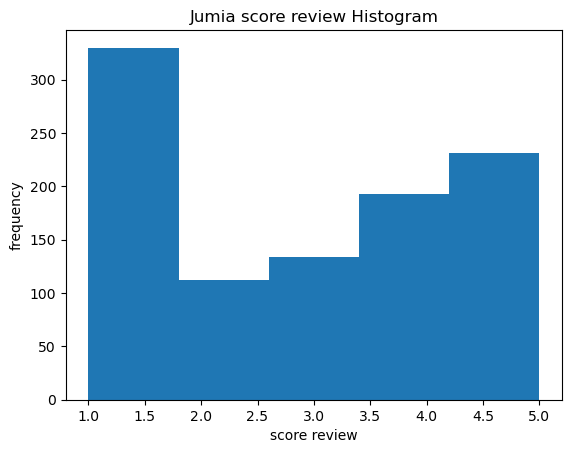

In [81]:

# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Jumia_pointsort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Jumia score review Histogram")
plt.show()

### KILIMALL - EXPLORATORY DATA ANALYSIS

##### CHECKING MISSING VALUES

In [106]:
Kilimall_pointsort_data_sum_missing = Kilimall_pointsort_data.isnull().sum()
print(Jumia_pointsort_data_sum_missing) 

content                  0
reviewCreatedVersion    47
score                    0
at                       0
thumbsUpCount            0
dtype: int64


#### CHECKING THE REVIEWS IN TERMS OF SCORES TO SEE IF THERE IS MORE POSTIVE THAN THAN NEGATIVE FEEDBACK

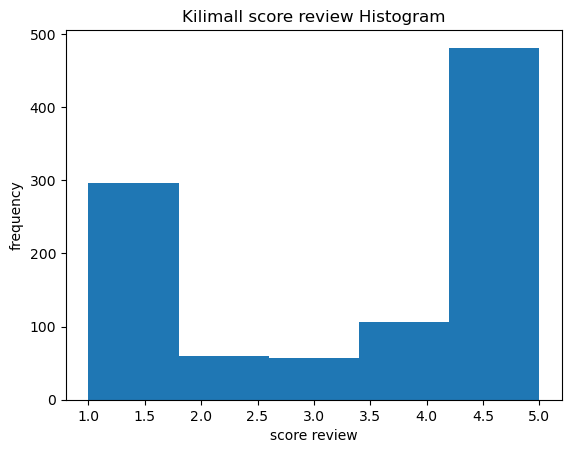

In [107]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Kilimall_pointsort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Kilimall score review Histogram")
plt.show()

### JIJI - EXPLORATORY DATA ANALYSIS

##### CHECKING MISSING VALUES

In [108]:
Jiji_pointsort_data_sum_missing = Jiji_pointsort_data.isnull().sum()
print(Jiji_pointsort_data_sum_missing) 

content                  0
reviewCreatedVersion    99
score                    0
at                       0
thumbsUpCount            0
dtype: int64


#### CHECKING THE REVIEWS IN TERMS OF SCORES TO SEE IF THERE IS MORE POSTIVE THAN THAN NEGATIVE FEEDBACK

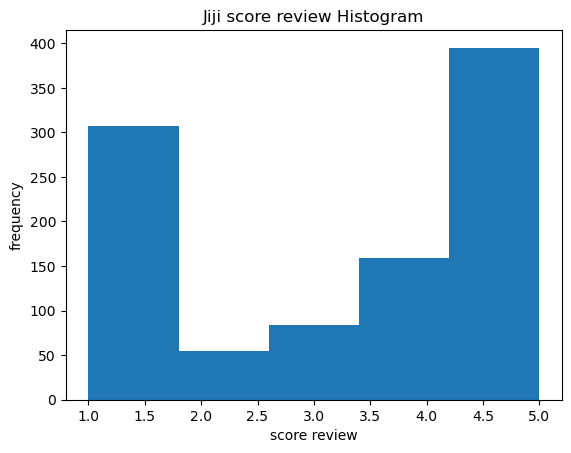

In [109]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Jiji_pointsort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Jiji score review Histogram")
plt.show()

### JUMIA - DATA PREPROCESSING

###  Lowercasing - this is to maintain consistency of data

In [133]:
# check data type of content and change to str
type(Jumia_pointsort_data["content"])


pandas.core.series.Series

In [134]:
#convert to str
Jumia_pointsort_data['content'] = Jumia_pointsort_data['content'].astype(str)
print(Jumia_pointsort_data['content'].head(20))  


699    the item are very expensive comparing to the a...
146    please if more staffs can be added to the baye...
348    of late your deliveries fees is too high, is l...
277    no cash on delivery, deliveries take long, pay...
930    the app no longer opens, always inscribing no ...
6      i have been unable to run the app on my phone ...
907                  very simple to order , thanks jumia
885    jumia is convenient shopping site that help a ...
465    i so much love this app but recently it came u...
19     since the new update i can't find jumia pick u...
101    it is a nice and user friendly app. their pric...
291    great initiative to marketing... but please 2d...
517    nice and portable cheep stuff really good you ...
796    shopping is easy but delivery is too slow. it ...
23     jumia service delivery have become absolutely ...
243    fast delivery for this app and you can pay for...
7      for almost a year,i uninstalled the app and to...
814    i like the app but the w

In [127]:
#Lowercase all reviews

Jumia_pointsort_data['content'] = Jumia_pointsort_data['content'].apply(lambda x: x.lower())
print(Jumia_pointsort_data['content'].head()) 

# Most of the reviews are already in lowercase so can see the difference if we look at the whole dataset.


699    the item are very expensive comparing to the a...
146    please if more staffs can be added to the baye...
348    of late your deliveries fees is too high, is l...
277    no cash on delivery, deliveries take long, pay...
930    the app no longer opens, always inscribing no ...
Name: content, dtype: object


### Emojis

In [130]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Jumia_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Jumia_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[100])    


True
wonderful service. good products. fast deliveries, but they should work on more user friendly ui and ux for this mobile app, quite choppy and obvious.


### Stopwords

Removing stopwords can improve the performance to a great extent. Words such as myself, me , she, he , they , mine, you etc. When these words are removed only meaningful tokens are left.


In [131]:
# removing stop words
stop_words = stopwords.words('english')
Jumia_pointsort_data["extracted_emojis"] = extracted_emojis
Jumia_pointsort_data["extracted_emojis"] = Jumia_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Jumia_pointsort_data['extracted_emojis'].head())

699    the item are very expensive comparing to the a...
146    please if more staffs can be added to the baye...
348    of late your deliveries fees is too high, is l...
277    no cash on delivery, deliveries take long, pay...
930    the app no longer opens, always inscribing no ...
Name: extracted_emojis, dtype: object


### Stemming
Stemming is also an important process, it chops off the end of the word and transform the word into its root form. All suffixes like -s, -es, -ed, -ing are removed.


In [132]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


Jumia_pointsort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Jumia_pointsort_data['extracted_emojis'].head())      
     

699    the item are very expensive comparing to the a...
146    please if more staffs can be added to the baye...
348    of late your deliveries fees is too high, is l...
277    no cash on delivery, deliveries take long, pay...
930    the app no longer opens, always inscribing no ...
Name: extracted_emojis, dtype: object


### JUMIA SENTIMENT ANALYSIS

In [163]:
# * Check out this code if the output is correct

#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Jumia_pointsort_data["Sentiment_score"]= Jumia_pointsort_data["extracted_emojis"].apply(senti_sc)
print(Jumia_pointsort_data.loc[0:19,['extracted_emojis','Sentiment_score']])



Empty DataFrame
Columns: [extracted_emojis, Sentiment_score]
Index: []


In [137]:
#for i in 
Jumia_pointsort_data['Sentiment_score'][0]

Sentiment(polarity=0.2972222222222223, subjectivity=0.4694444444444445)

In [138]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Jumia_pointsort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [139]:
Jumia_pointsort_data['polarity'] = polarity
Jumia_pointsort_data['subjectivity'] = subjectivity


In [143]:
conditions = [(Jumia_pointsort_data['polarity'] < 0),(Jumia_pointsort_data['polarity'] == 0),(Jumia_pointsort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Jumia_pointsort_data['feedback'] = np.select(conditions,values)

Jumia_pointsort_data[Jumia_pointsort_data.polarity>0].head(10)

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
146,please if more staffs can be added to the baye...,16.6.1,3,2024-11-15 18:11:00,0,please if more staffs can be added to the baye...,"(0.04000000000000002, 0.29333333333333333)",0.040000,0.293333,positive feedback
277,"no cash on delivery, deliveries take long, pay...",16.3.0,1,2024-11-15 16:48:30,0,"no cash on delivery, deliveries take long, pay...","(0.08666666666666663, 0.5066666666666667)",0.086667,0.506667,positive feedback
907,"very simple to order , thanks jumia",16.5.1,5,2024-11-15 13:45:59,0,"very simple to order , thanks jumia","(0.1, 0.3321428571428572)",0.100000,0.332143,positive feedback
885,jumia is convenient shopping site that help a ...,16.6.1,5,2024-11-15 12:46:26,0,jumia is convenient shopping site that help a ...,"(0.2, 0.4)",0.200000,0.400000,positive feedback
465,i so much love this app but recently it came u...,15.4.0,1,2024-11-15 11:11:17,0,i so much love this app but recently it came u...,"(0.025, 0.3875)",0.025000,0.387500,positive feedback
19,since the new update i can't find jumia pick u...,16.6.1,1,2024-11-15 10:50:57,0,since the new update i can't find jumia pick u...,"(0.27878787878787875, 0.7848484848484848)",0.278788,0.784848,positive feedback
101,it is a nice and user friendly app. their pric...,16.5.1,5,2024-11-14 21:29:41,0,it is a nice and user friendly app. their pric...,"(0.29375, 0.6)",0.293750,0.600000,positive feedback
291,great initiative to marketing... but please 2d...,16.6.1,4,2024-11-14 14:06:07,0,great initiative to marketing... but please 2d...,"(0.5, 0.475)",0.500000,0.475000,positive feedback
517,nice and portable cheep stuff really good you ...,16.5.1,5,2024-11-14 11:47:13,0,nice and portable cheep stuff really good you ...,"(0.6499999999999999, 0.8)",0.650000,0.800000,positive feedback
243,fast delivery for this app and you can pay for...,16.5.1,5,2024-11-14 07:11:54,0,fast delivery for this app and you can pay for...,"(0.6, 0.44999999999999996)",0.600000,0.450000,positive feedback



#### What are the main issues or complaints highlighted by customers in their negative feedback?

In [144]:
subject_matter = Jumia_pointsort_data[Jumia_pointsort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
699,the item are very expensive comparing to the a...,16.5.1,1,2024-11-15 19:42:57,0,the item are very expensive comparing to the a...,"(-0.325, 0.505)",-0.325000,0.505000,negative feedback
348,"of late your deliveries fees is too high, is l...",16.5.1,2,2024-11-15 18:08:13,0,"of late your deliveries fees is too high, is l...","(-0.06799999999999998, 0.5813333333333333)",-0.068000,0.581333,negative feedback
796,shopping is easy but delivery is too slow. it ...,None,1,2024-11-14 10:02:34,0,shopping is easy but delivery is too slow. it ...,"(-0.04166666666666667, 0.5583333333333333)",-0.041667,0.558333,negative feedback
23,jumia service delivery have become absolutely ...,16.5.1,2,2024-11-14 08:01:43,0,jumia service delivery have become absolutely ...,"(-0.38, 0.5433333333333333)",-0.380000,0.543333,negative feedback
21,i like the concept of the app and i've made qu...,16.5.1,4,2024-11-13 15:09:07,0,i like the concept of the app and i've made qu...,"(-0.29, 0.5700000000000001)",-0.290000,0.570000,negative feedback


positive feedback    0.667
negative feedback    0.262
neutral feedback     0.071
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Jumia feedback rate')

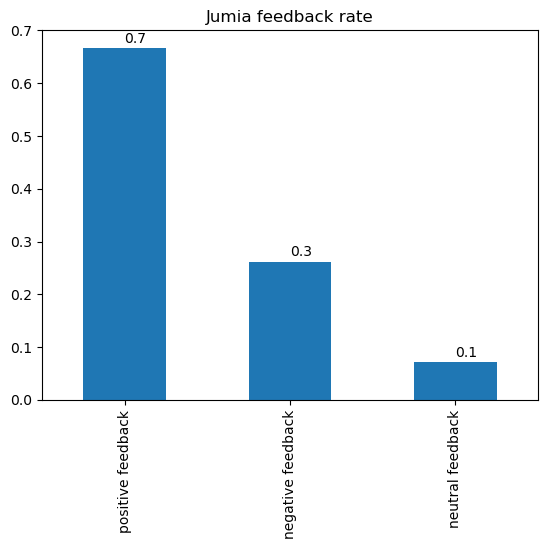

In [145]:
print(Jumia_pointsort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Jumia_pointsort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Jumia feedback rate')

positive feedback    667
negative feedback    262
neutral feedback      71
Name: feedback, dtype: int64


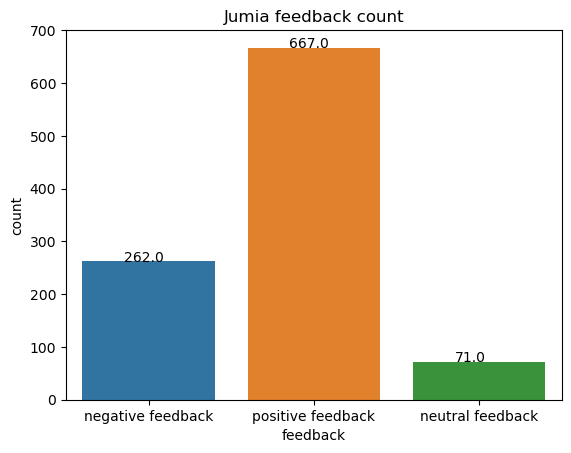

In [146]:
print(Jumia_pointsort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Jumia_pointsort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Jumia feedback count');

#### Comparing Scoresof the different Apps

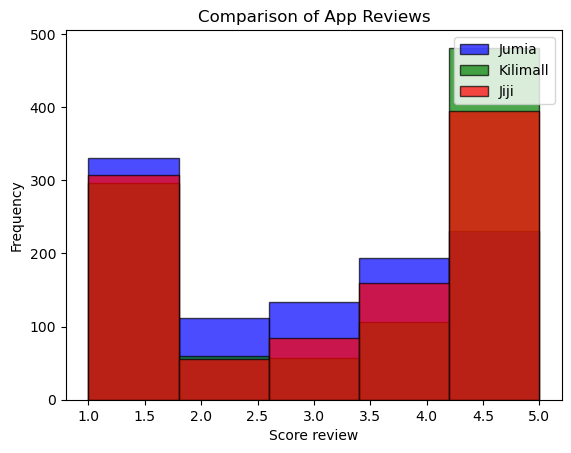

In [113]:

# Plot histograms for each app
plt.hist(Jumia_pointsort_data['score'], bins=5, alpha=0.7, label='Jumia', color='blue', edgecolor='black')
plt.hist(Kilimall_pointsort_data['score'], bins=5, alpha=0.7, label='Kilimall', color='green', edgecolor='black')
plt.hist(Jiji_pointsort_data['score'], bins=5, alpha=0.7, label='Jiji', color='red', edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Score review')
plt.ylabel('Frequency')
plt.title('Comparison of App Reviews')
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [ ]:
**** I thought a grouped bar chart would make more sense but I couldn't figure a way of improving this code.


# Create bar positions
score = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'] 
x = np.arange(len('score'))  # Correctly use the length of the ratings list
width = 0.25  # Width of each bar

# Plot grouped bars7 plt.bar(x - width, Jumia_pointsort_data, width, label='Jumia', color='blue')
plt.bar(x - width, Jumia_pointsort_data, width, label='Jumia', color='blue')
plt.bar(x, Kilimall_pointsort_data, width, label='Kilimall', color='green')
plt.bar(x + width, Jiji_pointsort_data, width, label='Jiji', color='red')

# Add labels, title, and legend
plt.xlabel('Score review')
plt.ylabel('Frequency')
plt.title('Comparison of App Reviews')
plt.xticks(x, score)  # Use the ratings list for x-axis labels
plt.legend()

# Display the chart
plt.show()


##### Notes On Jumia Analysis - to be completed
1. Which online store (Jumia, Kilimall, or Jiji) has the highest positive sentiment from customers based on recent reviews?
2. What are the common pain points or negative experiences reported by users across these platforms?
3. Which features or aspects of online shopping do customers most frequently praise on each platform?
4. What actionable insights can be drawn to enhance the functionality and user experience of the new app "X" based on customer feedback from existing platforms? 

### KILIMALL - DATA PREPROCESSING
#### Lowercasing - this is to maintain consistency of data

In [153]:
# check data type of content and change to str
type(Kilimall_pointsort_data["content"])


pandas.core.series.Series

In [154]:
#convert to str
Kilimall_pointsort_data['content'] = Kilimall_pointsort_data['content'].astype(str)
print(Kilimall_pointsort_data['content'].head(20))  


256                   very fast delivery. I enjoyed it 3
41     Best online shopping app, delivery on time,you...
4      It is great app i love it when shopping it is ...
237    kilimall to the world the best online shopping...
214                      Very fast and good shopping app
127    affordable quality products and fast delivery ...
238                          Reliable app secure payment
229                          Very nice shopping platform
164          Excellent service and the product is super.
2      I really appreciate your customer service. I w...
103    this is the most trusted online shopping app w...
230                    Very good app for shopping online
764                               Good site for shopping
457    I dint took my last parcel..was broken and inc...
248       Always satisfied with my orders,thanks kilimal
29     Great shopping app. Very good prices, and seam...
34     l like the product since it's of high quality ...
739                            

In [155]:
#Lowercase all reviews

Kilimall_pointsort_data['content'] = Kilimall_pointsort_data['content'].apply(lambda x: x.lower())
print(Kilimall_pointsort_data['content'].head()) 

# Most of the reviews are already in lowercase so can see the difference if we look at the whole dataset.


256                   very fast delivery. i enjoyed it 3
41     best online shopping app, delivery on time,you...
4      it is great app i love it when shopping it is ...
237    kilimall to the world the best online shopping...
214                      very fast and good shopping app
Name: content, dtype: object


### Emojis

In [164]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Kilimall_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Kilimall_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[100])    

True
it's my shoping app, really like kilimall


### Stopwords

In [157]:
# removing stop words
stop_words = stopwords.words('english')
Kilimall_pointsort_data["extracted_emojis"] = extracted_emojis
Kilimall_pointsort_data["extracted_emojis"] = Kilimall_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Kilimall_pointsort_data['extracted_emojis'].head())

256                   very fast delivery. i enjoyed it 3
41     best online shopping app, delivery on time,you...
4      it is great app i love it when shopping it is ...
237    kilimall to the world the best online shopping...
214                      very fast and good shopping app
Name: extracted_emojis, dtype: object


### Stemming

In [158]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


Kilimall_pointsort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Kilimall_pointsort_data['extracted_emojis'].head())      
     

256                   very fast delivery. i enjoyed it 3
41     best online shopping app, delivery on time,you...
4      it is great app i love it when shopping it is ...
237    kilimall to the world the best online shopping...
214                      very fast and good shopping app
Name: extracted_emojis, dtype: object


### KILIMALL SENTIMENT ANALYSIS

In [161]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Kilimall_pointsort_data["Sentiment_score"]= Jumia_pointsort_data["extracted_emojis"].apply(senti_sc)
print(Kilimall_pointsort_data.loc[0:19,['extracted_emojis','Sentiment_score']])



                                      extracted_emojis  \
0    my no.1 online shopping shop i’ve been using k...   
596  good multifunctional machine working nicely ,l...   
627  kilimall is the best online market that delive...   
871                        it's very fast and friendly   
629  i like killmall it's amazing and have real sav...   
..                                                 ...   
152  its the best app ever, been using it for awhil...   
494  kilimall is the best....tis affordable if you ...   
983  amazing you guys are the best always now and f...   
476  delivered on time,i like the item well package...   
19   i have a problem with your return policy why c...   

                                Sentiment_score  
0      (0.2972222222222223, 0.4694444444444445)  
596               (-0.265, 0.42250000000000004)  
627                  (0.30000000000000004, 0.4)  
871    (0.7333333333333334, 0.5333333333333333)  
629   (-0.8499999999999999, 0.8333333333333333)  
.. 

In [165]:
#for i in 
Kilimall_pointsort_data['Sentiment_score'][0]

Sentiment(polarity=0.2972222222222223, subjectivity=0.4694444444444445)

In [166]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Kilimall_pointsort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [167]:
Kilimall_pointsort_data['polarity'] = polarity
Kilimall_pointsort_data['subjectivity'] = subjectivity


In [169]:
conditions = [(Kilimall_pointsort_data['polarity'] < 0),(Kilimall_pointsort_data['polarity'] == 0),(Kilimall_pointsort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Kilimall_pointsort_data['feedback'] = np.select(conditions,values)

Kilimall_pointsort_data[Jumia_pointsort_data.polarity>0].head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_2248\1587478942.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Kilimall_pointsort_data[Jumia_pointsort_data.polarity>0].head(10)


,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
256,very fast delivery. i enjoyed it 3,5.6.2,5,2024-11-15 21:53:36,0,very fast delivery. i enjoyed it 3,"(0.32708333333333334, 0.7416666666666667)",0.380000,0.740000,positive feedback
41,"best online shopping app, delivery on time,you...",5.6.2,5,2024-11-15 21:46:30,0,"best online shopping app, delivery on time,you...","(0.28214285714285714, 0.4642857142857143)",1.000000,0.300000,positive feedback
237,kilimall to the world the best online shopping...,5.6.2,5,2024-11-15 19:51:37,0,kilimall to the world the best online shopping...,"(0.24500000000000002, 0.31142857142857144)",0.700000,0.500000,positive feedback
238,reliable app secure payment,5.6.2,5,2024-11-15 07:58:00,0,reliable app secure payment,"(0.34750000000000003, 0.675)",0.400000,0.600000,positive feedback
229,very nice shopping platform,5.6.2,5,2024-11-15 06:46:52,0,very nice shopping platform,"(0.1, 0.6)",0.780000,1.000000,positive feedback
2,i really appreciate your customer service. i w...,5.6.2,5,2024-11-14 20:09:32,0,i really appreciate your customer service. i w...,"(0.025, 0.325)",0.200000,0.250000,positive feedback
230,very good app for shopping online,5.6.2,5,2024-11-14 18:48:12,0,very good app for shopping online,"(0.32159090909090904, 0.5198863636363636)",0.910000,0.780000,positive feedback
764,good site for shopping,5.6.2,4,2024-11-14 18:39:34,0,good site for shopping,"(0.425, 0.5)",0.700000,0.600000,positive feedback
457,i dint took my last parcel..was broken and inc...,5.6.2,1,2024-11-14 13:27:50,0,i dint took my last parcel..was broken and inc...,"(0.16666666666666666, 0.19444444444444445)",-0.133333,0.155556,negative feedback
248,"always satisfied with my orders,thanks kilimal",5.6.2,5,2024-11-14 10:27:49,0,"always satisfied with my orders,thanks kilimal","(0.06964285714285715, 0.4857142857142857)",0.500000,1.000000,positive feedback


#### What are the main issues or complaints highlighted by customers in their negative feedback?

In [170]:
subject_matter = Kilimall_pointsort_data[Kilimall_pointsort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
577,"very bad service, poor customer service 😔. all...",5.6.2,1,2024-11-13 09:05:59,0,"very bad service, poor customer service . all ...","(0.3275, 0.495)",-0.236667,0.822222,negative feedback
645,the flash sales are horrible 🤮🤢🤢🤢,5.6.2,1,2024-11-08 16:07:59,0,the flash sales are horrible,"(0.011111111111111108, 0.7333333333333334)",-1.000000,1.000000,negative feedback
423,flash sale fake without ooerable system,5.6.2,1,2024-11-01 00:18:37,0,flash sale fake without ooerable system,"(-0.09523809523809525, 0.3464285714285714)",-0.500000,1.000000,negative feedback
235,i ordered for shoes wrong shoe was delivered. ...,5.6.2,1,2024-10-29 10:41:36,1,i ordered for shoes wrong shoe was delivered. ...,"(0.0, 1.0)",-0.737500,0.937500,negative feedback
8,worst customer service...good prices but when ...,5.6.1,1,2024-10-17 17:22:40,4,worst customer service...good prices but when ...,"(0.5404761904761904, 0.6488095238095237)",-0.038333,0.541667,negative feedback


positive feedback    0.701
negative feedback    0.251
neutral feedback     0.048
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Kilimall feedback rate')

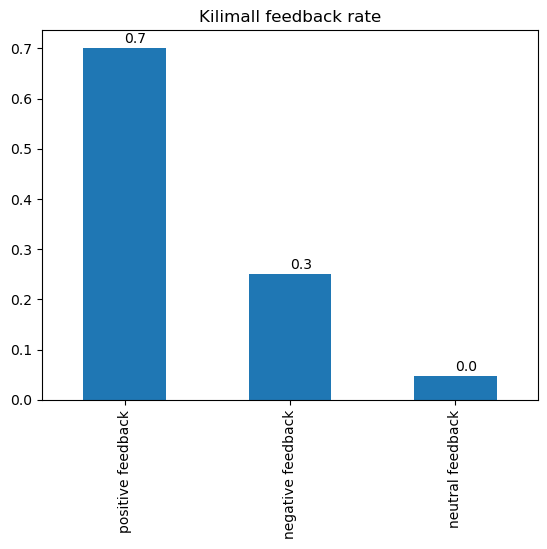

In [171]:
print(Kilimall_pointsort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Kilimall_pointsort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Kilimall feedback rate')

positive feedback    701
negative feedback    251
neutral feedback      48
Name: feedback, dtype: int64


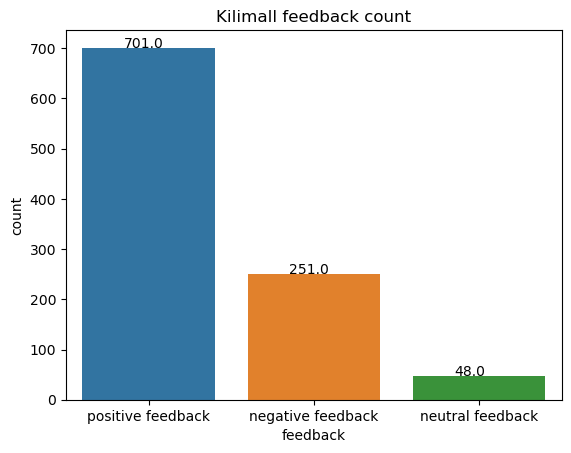

In [173]:
print(Kilimall_pointsort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Kilimall_pointsort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Kilimall feedback count');

##### Notes On Kilimall Analysis - to be completed
1. Which online store (Jumia, Kilimall, or Jiji) has the highest positive sentiment from customers based on recent reviews?
2. What are the common pain points or negative experiences reported by users across these platforms?
3. Which features or aspects of online shopping do customers most frequently praise on each platform?
4. What actionable insights can be drawn to enhance the functionality and user experience of the new app "X" based on customer feedback from existing platforms? 

### JIJI - DATA PREPROCESSING
### Lowercasing - this is to maintain consistency of data

In [174]:
# check data type of content and change to str
type(Jiji_pointsort_data["content"])


pandas.core.series.Series

In [175]:
#convert to str
Jiji_pointsort_data['content'] = Jiji_pointsort_data['content'].astype(str)
print(Jiji_pointsort_data['content'].head(20))  

327                     Definitely the best shopping app
653                   Best e-commerce platform in Kenya.
21     Not good at all even after paying for it so th...
648                                 great app i love it.
193    It is possible to get ads and advertise your p...
647                             It's good and convenient
196                             It's faster and reliable
608              Connect people help in customer connect
141    jiji has been a great app for me from purchasi...
231    Good would like fair deal we need to move with...
22     User friendly and functional. Plus it delivers...
62     It always gives the best platform for anyone t...
233    Great system of allowing small businesses to s...
651                             Nice with real customers
341    I've had an amazing experience at jiji so far....
889                   Efficient App for purchasing items
162       A reliable shopping app with amazing products.
671                   Getting c

In [176]:
#Lowercase all reviews

Jiji_pointsort_data['content'] = Jiji_pointsort_data['content'].apply(lambda x: x.lower())
print(Jiji_pointsort_data['content'].head()) 

# Most of the reviews are already in lowercase so can see the difference if we look at the whole dataset.


327                     definitely the best shopping app
653                   best e-commerce platform in kenya.
21     not good at all even after paying for it so th...
648                                 great app i love it.
193    it is possible to get ads and advertise your p...
Name: content, dtype: object


### Emojis

In [177]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Jiji_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Jiji_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[100])    

True
best for online purchases..


### Stopwords

In [178]:
# removing stop words
stop_words = stopwords.words('english')
Jiji_pointsort_data["extracted_emojis"] = extracted_emojis
Jiji_pointsort_data["extracted_emojis"] = Jiji_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Jiji_pointsort_data['extracted_emojis'].head())

327                     definitely the best shopping app
653                   best e-commerce platform in kenya.
21     not good at all even after paying for it so th...
648                                 great app i love it.
193    it is possible to get ads and advertise your p...
Name: extracted_emojis, dtype: object


### Stemming

In [179]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)

Jiji_pointsort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Jiji_pointsort_data['extracted_emojis'].head())      
     

327                     definitely the best shopping app
653                   best e-commerce platform in kenya.
21     not good at all even after paying for it so th...
648                                 great app i love it.
193    it is possible to get ads and advertise your p...
Name: extracted_emojis, dtype: object


### JIJI SENTIMENT ANALYSIS

In [180]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment
Jiji_pointsort_data["Sentiment_score"]= Jiji_pointsort_data["extracted_emojis"].apply(senti_sc)
print(Jiji_pointsort_data.loc[0:19,['extracted_emojis','Sentiment_score']])



                                      extracted_emojis  \
0    i have liked the app for the longest time beca...   
191  i have never been disappointed am working with...   
748  you keep closing my free ads and sending me em...   
321                        best for online purchases..   
685                    i love this app and its genuine   
227         best app to reach more potential customers   
70   i just like jiji because it does not need many...   
228  simply the best for selling and purchasing goo...   
692             am just 100 % sure it deserves 5 stars   
30   some lag is shown while replying. else it's good.   
234        best app to find customers for your product   
135  awesome app. got connected with so many people...   
980        likes the ease of use plus 100 more things    
273  ts a good app ,the customer care are good........   
621        bringing real products and well advertising   
19   have found this app very useful when purchasin...   

             

In [181]:
#for i in 
Jiji_pointsort_data['Sentiment_score'][0]

Sentiment(polarity=-0.11999999999999997, subjectivity=0.6433333333333333)

In [184]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Jiji_pointsort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [185]:
Jiji_pointsort_data['polarity'] = polarity
Jiji_pointsort_data['subjectivity'] = subjectivity


In [186]:
conditions = [(Jiji_pointsort_data['polarity'] < 0),(Jiji_pointsort_data['polarity'] == 0),(Jiji_pointsort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Jiji_pointsort_data['feedback'] = np.select(conditions,values)

Jiji_pointsort_data[Jumia_pointsort_data.polarity>0].head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_2248\4090279945.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Jiji_pointsort_data[Jumia_pointsort_data.polarity>0].head(10)


,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
327,definitely the best shopping app,4.10.2.3,5,2024-11-15 20:10:01,0,definitely the best shopping app,"(0.5, 0.4)",0.500,0.40000,positive feedback
653,best e-commerce platform in kenya.,4.10.2.3,5,2024-11-15 15:00:29,0,best e-commerce platform in kenya.,"(1.0, 0.3)",1.000,0.30000,positive feedback
648,great app i love it.,4.10.2.3,5,2024-11-14 20:11:14,0,great app i love it.,"(0.65, 0.675)",0.650,0.67500,positive feedback
193,it is possible to get ads and advertise your p...,4.10.2.3,5,2024-11-14 19:57:55,0,it is possible to get ads and advertise your p...,"(0.0, 1.0)",0.000,1.00000,neutral feedback
647,it's good and convenient,4.10.2.3,5,2024-11-14 19:57:14,0,it's good and convenient,"(0.7, 0.6000000000000001)",0.700,0.60000,positive feedback
231,good would like fair deal we need to move with...,4.10.2.3,5,2024-11-13 06:55:14,0,good would like fair deal we need to move with...,"(0.475, 0.53125)",0.475,0.53125,positive feedback
22,user friendly and functional. plus it delivers...,4.10.2.3,5,2024-11-12 18:28:26,0,user friendly and functional. plus it delivers...,"(0.375, 0.5)",0.375,0.50000,positive feedback
62,it always gives the best platform for anyone t...,4.10.2.3,4,2024-11-12 15:48:25,0,it always gives the best platform for anyone t...,"(1.0, 0.3)",1.000,0.30000,positive feedback
651,nice with real customers,4.10.2.3,5,2024-11-11 20:24:12,0,nice with real customers,"(0.4, 0.65)",0.400,0.65000,positive feedback
889,efficient app for purchasing items,4.9.0.2,5,2024-11-09 09:39:34,0,efficient app for purchasing items,"(0.0, 0.0)",0.000,0.00000,neutral feedback


#### What are the main issues or complaints highlighted by customers in their negative feedback?

In [187]:
subject_matter = Jiji_pointsort_data[Jiji_pointsort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
117,reliable only for a few frauds here and there ...,4.10.2.3,4,2024-10-25 08:26:25,0,reliable only for a few frauds here and there ...,"(-0.1, 0.55)",-0.10,0.550000,negative feedback
829,a lot of fake customers,4.10.1.0,5,2024-10-13 13:46:04,0,a lot of fake customers,"(-0.5, 1.0)",-0.50,1.000000,negative feedback
0,i have liked the app for the longest time beca...,4.10.1.0,2,2024-10-01 06:59:03,0,i have liked the app for the longest time beca...,"(-0.11999999999999997, 0.6433333333333333)",-0.12,0.643333,negative feedback
264,app was okay until i updated. i updated and lo...,None,2,2024-09-18 22:16:28,0,app was okay until i updated. i updated and lo...,"(-0.15000000000000002, 0.7)",-0.15,0.700000,negative feedback
186,jiji is the place where you'll quality stuff w...,4.10.0.0,5,2024-09-10 18:37:51,0,jiji is the place where you'll quality stuff w...,"(-0.75, 0.75)",-0.75,0.750000,negative feedback


positive feedback    0.715
negative feedback    0.220
neutral feedback     0.065
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Jiji feedback rate')

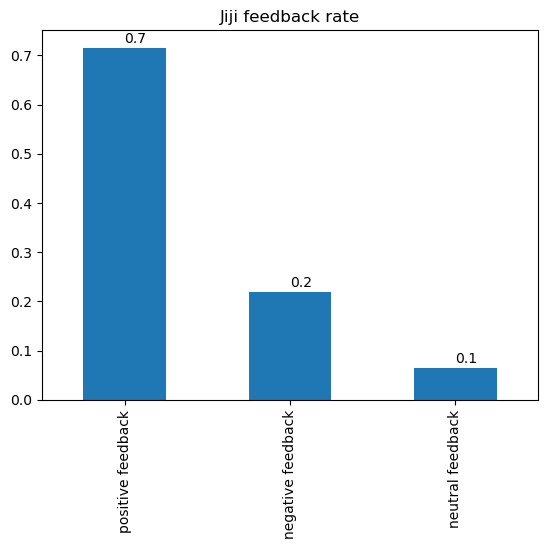

In [188]:
print(Jiji_pointsort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Jiji_pointsort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Jiji feedback rate')

positive feedback    715
negative feedback    220
neutral feedback      65
Name: feedback, dtype: int64


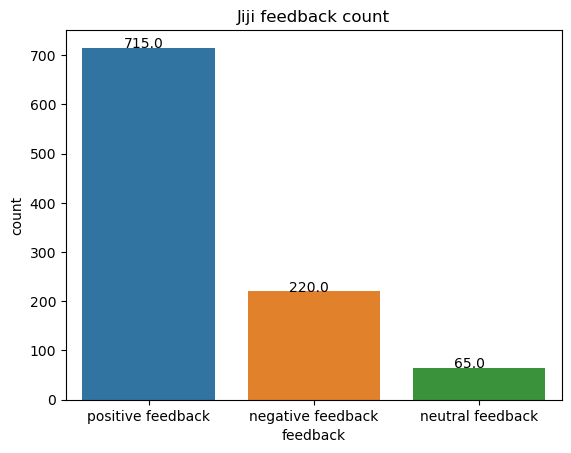

In [189]:
print(Jiji_pointsort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Jiji_pointsort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Jiji feedback count');

##### Notes On Jiji Analysis - to be completed
1. Which online store (Jumia, Kilimall, or Jiji) has the highest positive sentiment from customers based on recent reviews?
2. What are the common pain points or negative experiences reported by users across these platforms?
3. Which features or aspects of online shopping do customers most frequently praise on each platform?
4. What actionable insights can be drawn to enhance the functionality and user experience of the new app "X" based on customer feedback from existing platforms? 

#### Reccomendations on App X